Section 6 Figures:
- Eq 6.1 and Eq 6.2: Distribution of first decision times for Bernoulli case
    Do you even have this data saved? Can't look for it right now; you're calculating social update after first wave for the homogeneous case, theta = 0.1
- Eq 6.6 and 6.7: Distribution of first decision times for uniform case
- Eq 6.8: Expected first decision time for uniform case
- Eq 6.12: Expected size of first wave in uniform self-ref case, FDA
- Eq 6.13: Expected size of social information after first wave
    You'll need to run the social information to calculate this too ;;__;; 
- Eq 6.14: Expected size of first wave in uniform self-ref case, FDW

In [1]:
import os
print(os.getcwd())
import numpy as np
import scipy.special as sp
import seaborn as sns
import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
import matplotlib.pyplot as plt
import scipy.io as sio
from scipy.integrate import quad

C:\Users\Megan\Documents\Python Scripts\NMW Section 6


In [2]:
pi = np.pi

def phi(t,th):
    c = ((1 + np.exp(-th))*sp.erfc((th-t)/np.sqrt(4*t))+(1+np.exp(th))*sp.erfc((th + t)/np.sqrt(4*t)))/2
    return c

def rho(t,th):
    b = (th * np.exp(-(th**2+t**2)/(4*t))*np.cosh(th/2))/np.sqrt(pi*t**3)
    return b

def nmw61(t, th1, th2,n):
    phi1 = phi(t,th1)
    phi2 = phi(t,th2)
    psi = (1-phi1)*rho(t,th2) + (1-phi2)*rho(t,th1)
    p = (n/2)*(1-phi1)**(n/2-1)*(1-phi2)**(n/2-1)*psi
    return p

def nmw62(t, th1, th2, n):
    phi1 = phi(t,th1)
    phi2 = phi(t,th2)
    psi = (1-phi1)*rho(t,th2) + (1-phi2)*rho(t,th1)
    p = (n/2)*np.exp((1-n/2)*(phi1 + phi2))*psi
    return p



def nmw67(t,n,thMax = 1.0, a = 0.1):
    ths = []
    for i in range(0,n):
        ths.append(np.random.random_sample()*(thMax-a)+a)
    
    phis = [phi(t,th) for th in ths]
    yello = sum(phis)
    
    whees = [np.exp(phi(t,th)-yello)*rho(t,th) for th in ths]
    return sum(whees)

def nmw67andAhalf(t,n,thMax = 1.0, a = 0.1):
    ths = np.linspace(a,thMax,n)
    
    phis = [phi(t,th) for th in ths]
    yello = sum(phis)
    
    whees = [np.exp(phi(t,th)-yello)*rho(t,th) for th in ths]
    return sum(whees)

def nmw68(t, n, thMax = 1.0, a = 0.1):
    # I'm going to need to learn how to integrate in python for this >:(
    # p = n/(thMax-a)*np.exp(n/(a-thMax)*int^thMax_a(phi(t,th)dth))*int^thMax_a(rho(t,th)dth)
    intPhi = quad(phi,a,thMax, args = (t))
    #print(intPhi)
    intRho = quad(rho,a,thMax,args=(t))
    #print(intRho)
    p = float((n/(thMax-a)))*float(intRho[0])*(np.exp((n/(a-thMax))*intPhi[0]))#*intRho
    return p
    
def nmw69(a, thMax = 0.3, n = 100000):
    t = a**2/(2*np.log((2*a**5*n**2)/(27*(thMax-a)**2)))
    return t

def nmw613(a, n, thMax = 1):
    f1 = (n-1)/2*(1 + a/(np.sqrt(2*pi*np.log((2*a**5*n**2)/(27*(thMax-a)**2)))))
    return f1

def nmw614(a,n,thMax=1.0):
    c = (n*a**2)/(pi*np.log((2*(a**5)*(n**2))/(27*((thMax-a)**2))))
    return c
print(nmw613(0.1,1000))
def nmw615(a, n, thMax = 1):
    f1 = (n-1)/2*(1 - a/(np.sqrt(2*pi*np.log((2*a**5*n**2)/(27*(thMax-a)**2)))))
    return f1

sns.set()
sns.set(font_scale=1.2)
sns.set_style('ticks')
red_colors = sns.color_palette("Reds_d",9)
blue_colors = sns.color_palette("Blues_d",9)
orange_colors = sns.color_palette("YlOrBr_d",9)

nan


C:\Users\Megan\Anaconda3\lib\site-packages\ipykernel_launcher.py:62: RuntimeWarning: invalid value encountered in sqrt


In [30]:
# - Eq 6.1 and Eq 6.2: Distribution of first decision times for Bernoulli case
# You need the data for this. But all you need to do is run some Bernoulli cases on school computers. No Big Deal.
# Data is currently runnning

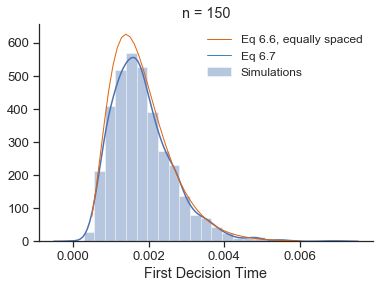

In [18]:
# - Eq 6.7 and 6.8: Distribution of first decision times for uniform case
# load histTime
# compare it to results for eq 66 67
# Need to space these a little further apart, somehow

uniformN150 = sio.loadmat('Uniform_0_1_Cooked_n150.mat')

time150 = np.linspace(.0005,.006)
eq66n150 = [nmw67(t, 150) for t in time150]
eq66Halfn150 = [nmw67andAhalf(t,150) for t in time150]
eq67n150 = [nmw68(t, 150.0) for t in time150]

#plt.subplot(1,2,1)
hist150 = uniformN150['histTime']
sns.distplot(hist150, bins=25,label = 'Simulations')
#plt.plot(time150,eq66n150, color=red_colors[4], lw=1, alpha=1, label = 'Eq 6.7') 
plt.plot(time150,eq66Halfn150, color=orange_colors[4], lw=1, alpha=1, label = 'Eq 6.7, equally spaced') 
plt.plot(time150,eq67n150, color=blue_colors[4], lw=1, alpha=1, label = 'Eq 6.8') 

plt.legend(fontsize=12, frameon=False)
plt.xlabel('First Decision Time')
plt.title('n = 150')

sns.despine()



#plt.subplot(1,2,2)


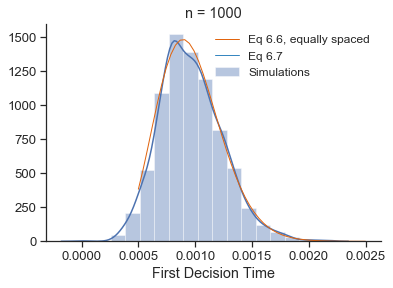

In [21]:
uniformN1000 = sio.loadmat('Uniform_0_1_Cooked_n1000.mat')

time1000 = np.linspace(.0005,.0025)
eq66n1000 = [nmw67(t, 1000) for t in time1000]
eq66Halfn1000 = [nmw67andAhalf(t,1000) for t in time1000]
eq67n1000 = [nmw68(t, 1000.0) for t in time1000]

hist1000 = uniformN1000['histTime']
sns.distplot(hist1000, bins = 17,label = 'Simulations')
#plt.plot(time1000,eq66n1000, color=red_colors[4], lw=1, alpha=1, label = 'Eq 6.7') 
plt.plot(time1000,eq66Halfn1000, color=orange_colors[4], lw=1, alpha=1, label = 'Eq 6.7, equally spaced') 
plt.plot(time1000,eq67n1000, color=blue_colors[4], lw=1, alpha=1, label = 'Eq 6.8') 

plt.legend(fontsize=12, frameon=False)
plt.xlabel('First Decision Time')
plt.title('n = 1000')

sns.despine()

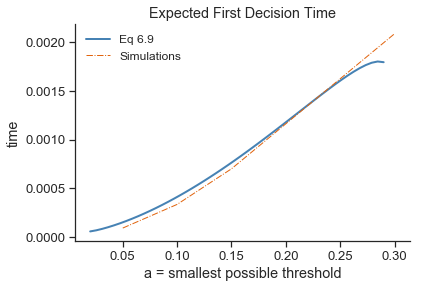

In [11]:
# - Eq 6.9: Expected first decision time for uniform case
# The data for this is in justUniTime
str1 = 'z2_0_3_n100000.mat'
strs = ['z_0_05'+str1,'z_0_1'+str1,'z_0_15'+str1,'z_0_3'+str1]
a_values = (0.05,0.1,0.15,0.3)
# I want what from these? You need to read in the array of times, 
# average it (sum, divide by length. length?)
as_values = np.linspace(0.02,0.29)
eq69 = [nmw69(a) for a in as_values]
simTimes = []
for i in range(0,4):
    fileName = strs[i]
    current = sio.loadmat(fileName)
    times = current['times']
    length = len(times)
    avg = sum(times)/length
    simTimes.append(avg)

plt.plot(as_values,eq69, color = 'steelblue', lw = 2, label = 'Eq 6.9')
plt.plot(a_values, simTimes, linestyle = 'dashdot', color = orange_colors[4], lw = 1, label = 'Simulations')

plt.legend(fontsize = 12, frameon = False)
plt.xlabel('a = smallest possible threshold')
plt.ylabel('time')
plt.title('Expected First Decision Time')

sns.despine()

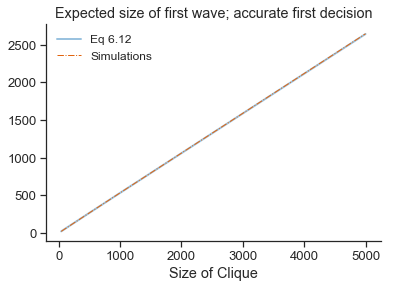

In [11]:
# - Eq 6.13: Expected size of first wave in uniform self-ref case, FDA

str1 = 'SelfUniform_0_5_Cooked_n'

n_values = (40,80,150,300,500,1000,5000)

f1 = [nmw613(0.5,n) for n in n_values]

f1File = []

for n in n_values:
    lookupstr = str1 + str(n) +'.mat'
    current = sio.loadmat(lookupstr)
    waves = current['wavesDec']
    #print(waves)
    avgf1 = waves.item(0,0)
    f1File.append(avgf1)
    
#print(f1File)
plt.plot(n_values,f1, color=blue_colors[4], lw=2, alpha=.5, label = 'Eq 6.13') 
plt.plot(n_values,f1File,linestyle = 'dashdot', color=orange_colors[4], lw=1, alpha=1,label = 'Simulations') 

plt.legend(fontsize=12, frameon=False)
plt.xlabel('Size of Clique')
plt.title('Expected size of first wave; accurate first decision')

sns.despine()

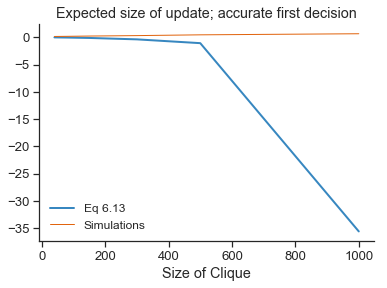

In [12]:
# - Eq 6.14: Expected size of social information after first wave
#    You'll need to run the social information to calculate this too ;;__;; 
# Ran it.
str1 = 'SelfUniform_0_1_Cooked_n'

n_values = (40,80,150,300,500,1000)

f1 = [nmw614(0.1,n,1.0) for n in n_values]

f1File = []

for n in n_values:
    lookupstr = str1 + str(n) +'.mat'
    current = sio.loadmat(lookupstr)
    avgUp = current['avgSecUpFDA']
    #print(waves)
    #avgf1 = waves.item(1,0)
    f1File.append(avgUp[0])
    
#print(f1File)
plt.plot(n_values,f1, color=blue_colors[4], lw=2, alpha=1, label = 'Eq 6.14') 
plt.plot(n_values,f1File, color=orange_colors[4], lw=1, alpha=1,label = 'Simulations') 

plt.legend(fontsize=12, frameon=False)
plt.xlabel('Size of Clique')
plt.title('Expected size of update; accurate first decision')

sns.despine()

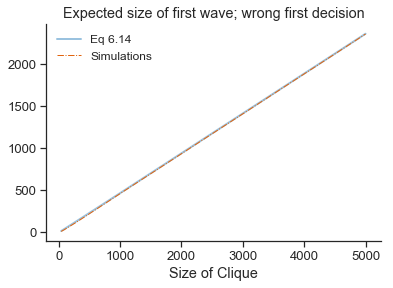

In [13]:
# - Eq 6.15: Expected size of first wave in uniform self-ref case, FDW

str1 = 'SelfUniform_0_5_Cooked_n'

n_values = (40,80,150,300,500,1000,5000)

f1 = [nmw615(0.5,n) for n in n_values]

f1File = []

for n in n_values:
    lookupstr = str1 + str(n) +'.mat'
    current = sio.loadmat(lookupstr)
    waves = current['wavesDec']
    #print(waves)
    avgf1 = waves.item(1,0)
    f1File.append(avgf1)
    
#print(f1File)
plt.plot(n_values,f1, color=blue_colors[4], lw=2, alpha=.5, label = 'Eq 6.15') 
plt.plot(n_values,f1File, linestyle = 'dashdot',color=orange_colors[4], lw=1, alpha=1,label = 'Simulations') 

plt.legend(fontsize=12, frameon=False)
plt.xlabel('Size of Clique')
plt.title('Expected size of first wave; wrong first decision')

sns.despine()